In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import os

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


In [ ]:
transform = transforms.Compose(
        [transforms.ToTensor(),
         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
    )

batch_size = 8

trainset = torchvision.datasets.CIFAR10(root='/data', train=True, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)


testset = torchvision.datasets.CIFAR10(root='/data', train=False, download=True, transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

dataiter = iter(testloader)
images, labels = next(dataiter)

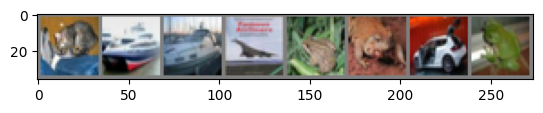

GroundTruth:  cat   ship  ship  plane frog  frog  car   frog 


In [14]:
# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(8)))

In [16]:
from CNN import CNN_ours

PATH = 'models/cifar_net.pth'
net = CNN_ours()
net.load_state_dict(torch.load(PATH, weights_only=True))
outputs = net(images)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(8)))

Predicted:  cat   ship  car   ship  deer  frog  car   frog 


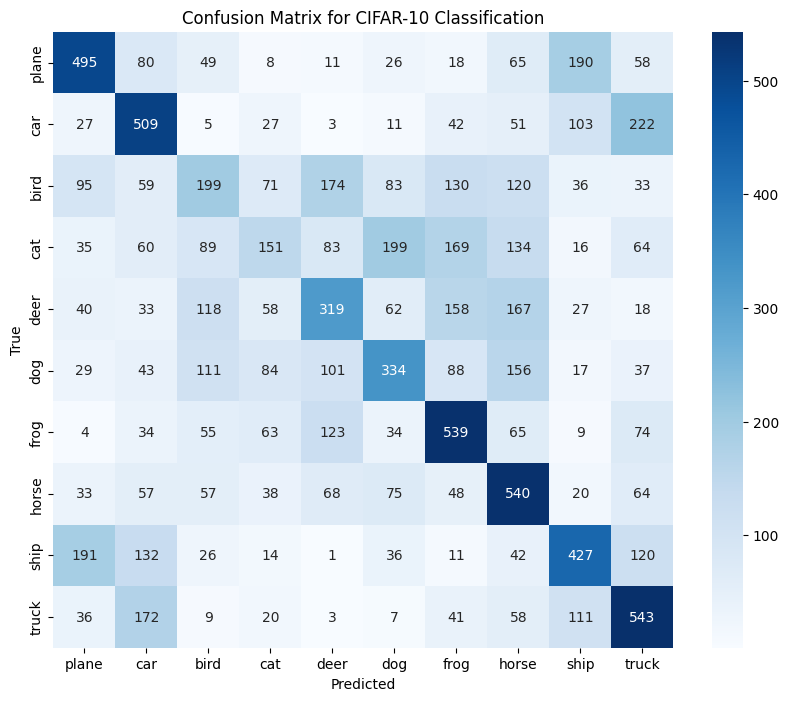

In [26]:
from CNN import CNN_ours
import seaborn as sns

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net = CNN_ours().to(device)
net.load_state_dict(torch.load('models/cifar_net.pth'))
net.eval()

# Initialize the confusion matrix
conf_matrix = np.zeros((10, 10))

# Evaluate the model on the test dataset
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        for label, prediction in zip(labels, predicted):
            conf_matrix[label.item(), prediction.item()] += 1

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', xticklabels=classes, yticklabels=classes, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for CIFAR-10 Classification')
plt.show()